# Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
X = df.iloc[:,[3,4]].values

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
from sklearn.cluster import KMeans
wcss=[]

In [10]:
k_values=range(1,11)
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [11]:
deltas = np.diff(wcss, 2)
optimal_k = k_values[np.argmin(deltas) ]

print(f"The optimal number of clusters (K) is: {optimal_k}")

The optimal number of clusters (K) is: 5


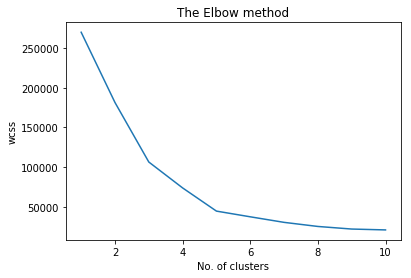

In [12]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

In [13]:
kmeansmodel = KMeans(n_clusters = optimal_k, init ='k-means++', random_state = 0)


In [14]:
y_kmeans = kmeansmodel.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

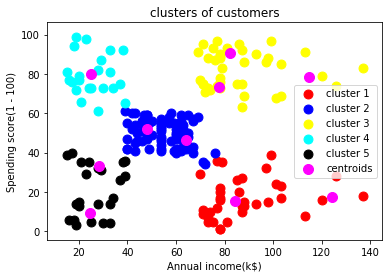

In [17]:
plt.scatter(X[y_kmeans == 0, 0],X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1, 0],X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'cluster 2') 
plt.scatter(X[y_kmeans == 2, 0],X[y_kmeans == 2, 1], s = 80, c = 'yellow', label = 'cluster 3')
plt.scatter(X[y_kmeans == 3, 0],X[y_kmeans == 3, 1], s = 80, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans == 4, 0],X[y_kmeans == 4, 1], s = 80, c = 'black', label = 'cluster 5') 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100, c = 'magenta', label = 'centroids')
plt.title("clusters of customers")
plt.xlabel("Annual income(k$)")
plt.ylabel("Spending score(1 - 100)")
plt.legend()
plt.show()

In [16]:
unique, counts = np.unique(y_kmeans, return_counts=True)
percentages = (counts / len(X)) * 100

for cluster, percentage in zip(unique, percentages):
    print(f"Cluster {cluster+1}: {percentage:.2f}%")

Cluster 1: 17.50%
Cluster 2: 40.50%
Cluster 3: 19.50%
Cluster 4: 11.00%
Cluster 5: 11.50%
